### 텐서

In [23]:
import torch

In [24]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [25]:
def print_tensor(x):
    print(x)
    print("Size:", x.size())
    print("Shape:", x.shape)
    print("랭크(차원):", x.ndimension())    

In [26]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)   # 0번째에 차원에 1이라는 차원값 추가
print_tensor(x)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [27]:
# 랭크 줄이기
x = torch.squeeze(x)    # 크기가 1인 랭크 모두 삭제
print_tensor(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [28]:
# 랭크 조절하기
x = x.view(9)
print_tensor(x)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [29]:
try:
    x = x.view(2, 4)
except Exception as e:
    print(e)  # 에러 출력

shape '[2, 4]' is invalid for input of size 9


### 텐서 연산, 행렬곱

In [33]:
def print_tensor(x):
    print(x)
    print("Size:", x.size())
    #print("Shape:", x.shape)
    print("랭크(차원):", x.ndimension())
    print()

In [34]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
print_tensor(w)
print_tensor(x)

tensor([[-1.3368,  1.3186,  1.7713],
        [-0.8863, -0.0037, -2.8075],
        [ 0.2184,  0.4993,  0.6738],
        [ 0.5366, -0.9671,  0.9478],
        [-1.7942, -0.0262,  1.8329]])
Size: torch.Size([5, 3])
랭크(차원): 2

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Size: torch.Size([3, 2])
랭크(차원): 2



In [35]:
b = torch.randn(5,2, dtype=torch.float)
print_tensor(b)

tensor([[-0.0549, -0.4547],
        [ 0.1431, -0.2549],
        [ 0.5440,  0.2855],
        [-0.6599, -1.1778],
        [-0.1284,  1.2504]])
Size: torch.Size([5, 2])
랭크(차원): 2



In [36]:
wx = torch.mm(w,x)  # 행렬곱 matrix multiplication
print_tensor(wx)

tensor([[ 11.4754,  13.2286],
        [-14.9349, -18.6324],
        [  5.0856,   6.4772],
        [  2.3743,   2.8915],
        [  7.2916,   7.3040]])
Size: torch.Size([5, 2])
랭크(차원): 2



In [37]:
# 행렬곱 형태 맞추기
try:
    torch.mm(b,x)
except Exception as e:
    print(e)

mat1 and mat2 shapes cannot be multiplied (5x2 and 3x2)


In [39]:
result = wx + b
print_tensor(result)

tensor([[ 11.4206,  12.7739],
        [-14.7918, -18.8874],
        [  5.6296,   6.7627],
        [  1.7144,   1.7137],
        [  7.1632,   8.5544]])
Size: torch.Size([5, 2])
랭크(차원): 2



### Autograd

In [53]:
w = torch.tensor(1.0, requires_grad=True)

In [54]:
a = w*3

In [55]:
l = a**2

# l = 9w^2

In [56]:
l.backward()
print(f"l을 w로 미분한 값은 {w.grad}")

l을 w로 미분한 값은 18.0


In [71]:
# 오차역전파법 계산해서 grad 값 예상해보자
w = torch.tensor(1.0, requires_grad=True)
a = w*3
b = a + w
c = 8*b
d = c*2

In [72]:
d.backward()
print(w.grad)

tensor(64.)


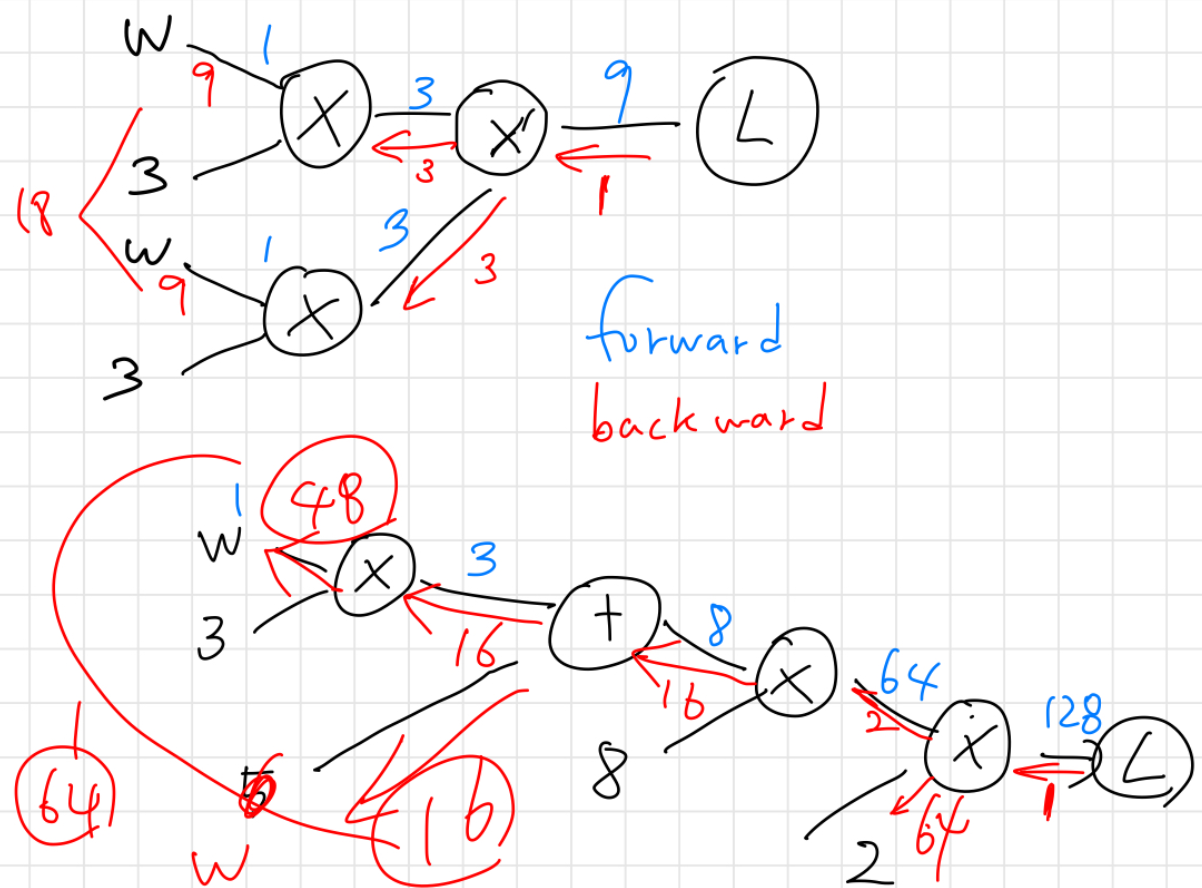

In [73]:
import torch
import pickle
import matplotlib.pyplot as plt

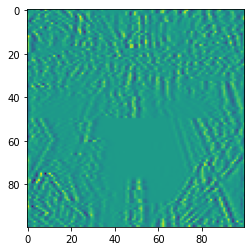

In [77]:
# 오염된 이미지 읽어오기
path = "/content/drive/MyDrive/3-min-pytorch/3-min-pytorch-master/03-파이토치로_구현하는_ANN"
broken_image = torch.FloatTensor(pickle.load(open(f"{path}/broken_image_t.p", 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))
plt.show()

In [135]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0]*h + filt[2]*h_l + filt[1]*h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h

In [136]:
def distance_loss(hypothesis, broken_image):        # 굳이??????????
    return torch.dist(hypothesis, broken_image)

In [137]:
random_tensor = torch.randn(10000, dtype=torch.float)

In [138]:
lr = 0.8

In [158]:
# 경사하강법 구현
for i in range(20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():   # 직접 구현하기 때문에 자동 기울기 계산 비활성화
        random_tensor = random_tensor - lr*random_tensor.grad   # 경사하강법
    if i % 1000 == 0:
        print(f"Loss at {i} = {loss.item()}")

Loss at 0 = 0.2133333534002304
Loss at 1000 = 0.18615815043449402
Loss at 2000 = 0.16298408806324005
Loss at 3000 = 0.14240272343158722
Loss at 4000 = 0.12360312789678574
Loss at 5000 = 0.10607403516769409
Loss at 6000 = 0.08947399258613586
Loss at 7000 = 0.07356909662485123
Loss at 8000 = 0.05819695442914963
Loss at 9000 = 0.04324495047330856
Loss at 10000 = 0.028636666014790535
Loss at 11000 = 0.02115636132657528
Loss at 12000 = 0.021166281774640083
Loss at 13000 = 0.021167675033211708
Loss at 14000 = 0.02116808108985424
Loss at 15000 = 0.021166687831282616
Loss at 16000 = 0.02116822823882103
Loss at 17000 = 0.021166522055864334
Loss at 18000 = 0.021164581179618835
Loss at 19000 = 0.021163972094655037


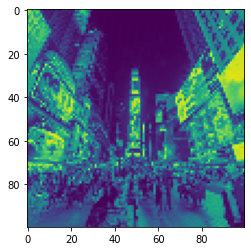

In [159]:
plt.imshow(random_tensor.view(100,100).data)
plt.show()

### 간단한 인공 신경망 구현

In [144]:
import numpy as np
from sklearn.datasets import make_blobs

In [169]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim,
                              centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                              shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim,
                            centers=[[1,1], [-1,-1], [1,-1], [-1,1]],
                            shuffle=True, cluster_std=0.3)

In [170]:
def label_map(y_, from_, to_):       # '_'의 의미????????????????
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

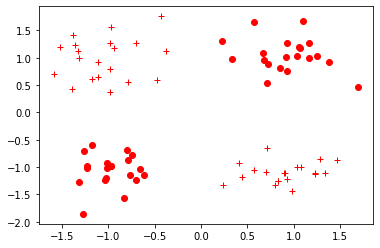

In [173]:
def vis_data(x,y=None, c='r'):
    if y is None:
        y = [None] * len(x)   # else부분 맞추려고 일부러
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [176]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [178]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output